In [1]:
import pandas as pd

# Windows path with raw string
df = pd.read_csv(r"C:\Users\himan\Downloads\data.csv")

print(df.head())


               date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 00:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 00:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 00:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 00:00   420000.0         3       2.25         2000      8030   
4  02-05-2014 00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  st

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Same folder me ho to direct load
df = pd.read_csv("data.csv")

# First few rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

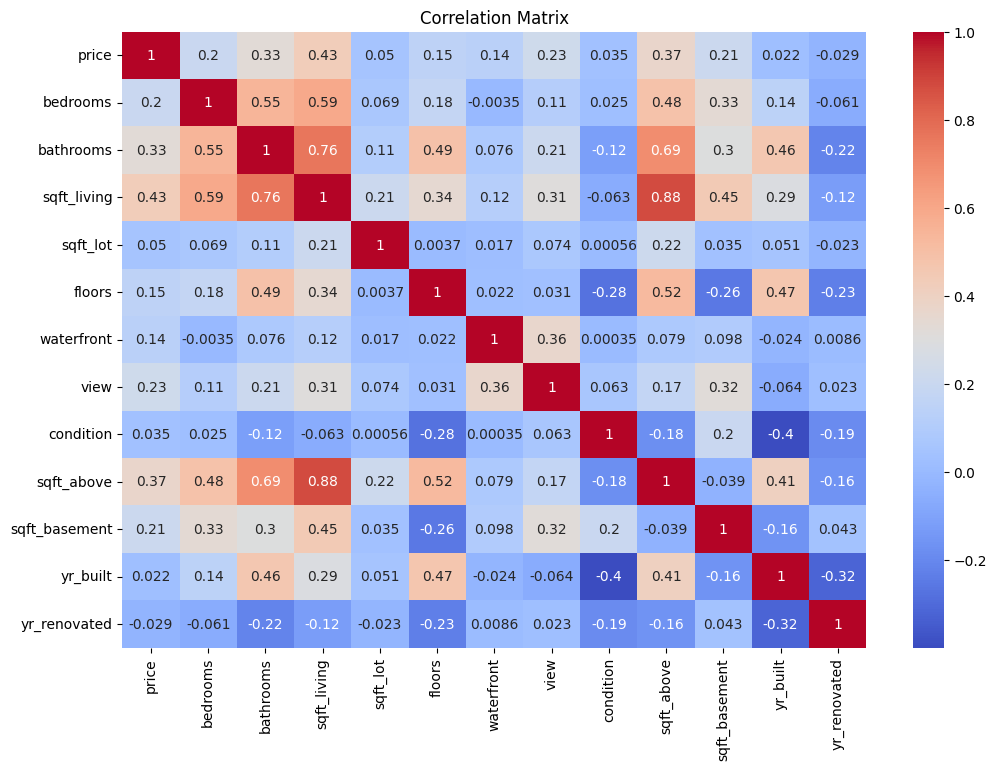

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sirf numeric columns nikaalo
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap plot karo
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [6]:
print(df.columns)



Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [7]:
import pandas as pd

# Step 1: Load your data (assuming CSV is in same folder)
df = pd.read_csv("data.csv")  # replace with your file path if needed

# Step 2: Drop unnecessary columns safely
df = df.drop(columns=['date', 'street', 'country'], errors='ignore')
print("Dropped columns successfully.")


Dropped columns successfully.


In [8]:
print(df.shape)
print(df.columns)


(4600, 15)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip'],
      dtype='object')


In [9]:
df = pd.read_csv("data.csv")
print("Loaded")
df = df.drop(columns=['date', 'street', 'country'], errors='ignore')
print("Dropped columns successfully.")


Loaded
Dropped columns successfully.


In [10]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement']
target = 'price'

X = df[features]
y = df[target]

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())




Features (X):
   bedrooms  bathrooms  sqft_living  floors  condition  sqft_above  \
0         3       1.50         1340     1.5          3        1340   
1         5       2.50         3650     2.0          5        3370   
2         3       2.00         1930     1.0          4        1930   
3         3       2.25         2000     1.0          4        1000   
4         4       2.50         1940     1.0          4        1140   

   sqft_basement  
0              0  
1            280  
2              0  
3           1000  
4            800  

Target (y):
0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


In [11]:
print(type(df))
print(df.shape)
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
(4600, 15)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv("data.csv")

# Select features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'sqft_above', 'sqft_basement']
target = 'price'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: check the shape of the splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)



Training features shape: (3680, 7)
Test features shape: (920, 7)


In [13]:
X_small = X.sample(500, random_state=1)
y_small = y.loc[X_small.index]

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Prediction complete.")





Prediction complete.


In [14]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² Score: -0.04018866324658554
RMSE: 205387.76250937302


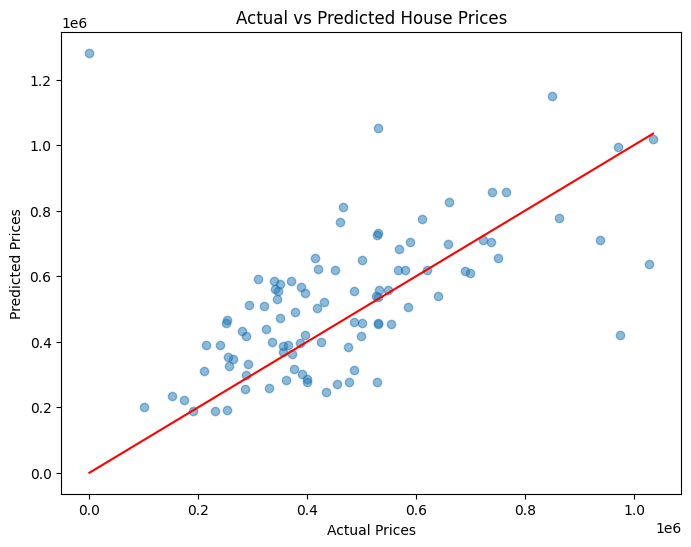

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal prediction line
plt.show()


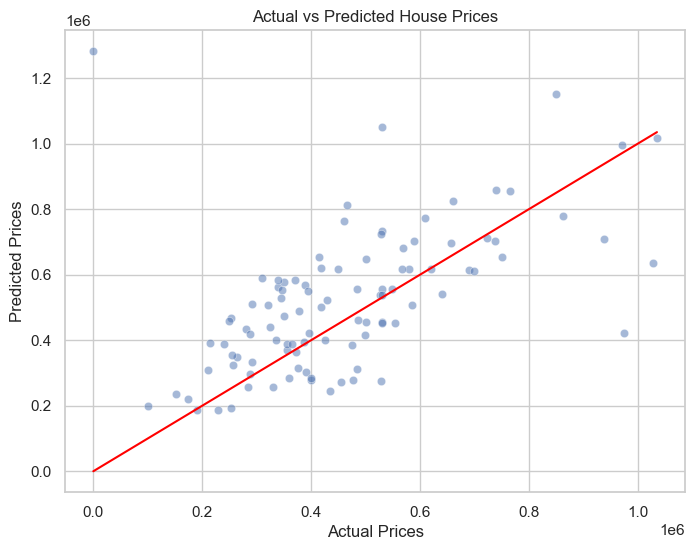

In [16]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


In [17]:
# Example: 3 bedroom, 2 bathroom, 1600 sqft living, 1 floor, condition=3, 1300 above, 300 basement
new_data = pd.DataFrame([[3, 2, 1600, 1, 3, 1300, 300]], columns=features)
predicted_price = model.predict(new_data)
print(f"Predicted Price for New House: ₹{predicted_price[0]:,.2f}")

Predicted Price for New House: ₹388,774.10


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} R² Score: {r2_score(y_test, y_pred):.4f}")


Linear Regression R² Score: -0.0402
Decision Tree R² Score: -0.3089
Random Forest R² Score: -0.1279


In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 139773.49356457335
RMSE: 213872.15251166056


<Axes: >

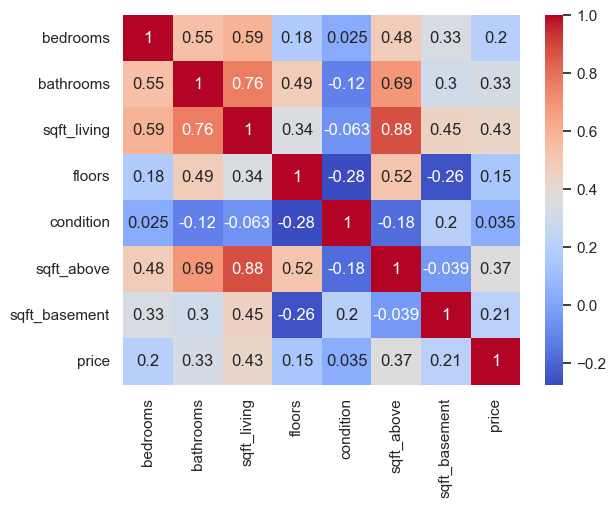

In [20]:
import seaborn as sns
sns.heatmap(df[features + ['price']].corr(), annot=True, cmap='coolwarm')


In [21]:
import joblib
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [22]:
X = df[['bedrooms', 'bathrooms', 'sqft_living']]
y = df['price']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)



RandomForestRegressor()

In [23]:
print(df.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [24]:
print(df.columns.tolist())


['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [25]:
['BHK', 'Bath', 'Size', 'Price']


['BHK', 'Bath', 'Size', 'Price']

In [26]:
print("✅ Columns in your dataset:\n", df.columns.tolist())


✅ Columns in your dataset:
 ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [27]:
print(df.columns.tolist())


['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']


In [28]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2. Load dataset
df = pd.read_csv("data.csv")  # Change filename if needed

# 3. Select features and target
X = df[['bedrooms', 'bathrooms', 'sqft_living']]
y = df['price']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# 6. Take user input
bedrooms = int(input("Number of bedrooms: "))
bathrooms = int(input("Number of bathrooms: "))
sqft = int(input("Living area in sqft: "))

# 7. Create input DataFrame
input_data = pd.DataFrame([{
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'sqft_living': sqft
}])

# 8. Predict
predicted_price = model.predict(input_data)

print(f"\n🏠 Predicted House Price: ₹{predicted_price[0]:,.2f}")
